In [223]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀 - 예측
from sklearn.linear_model import LinearRegression    # 선형 회귀
from sklearn.preprocessing import PolynomialFeatures  # 다항특성 만들어주는 라이브러리
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 설정
matplotlib.rcParams['font.size'] = 10 #글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [224]:
df = pd.read_csv('https://bit.ly/fish_csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [225]:
# data 분리
fish_input = df.iloc[:,1:].to_numpy()
fish_target = df['Species'].to_numpy()

In [226]:
# train, test 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target, random_state=42)

In [227]:
df.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [228]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [229]:
# 표준화 작업 (max 기준 데이터를 비율로 표준화)
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [230]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

LogisticRegression()

In [231]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.8067226890756303
0.85


경사하강법

In [232]:
# 경사하강법 - 머신러닝 훈련 방법 (=최적화 방법)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [233]:
# logistic의 loss = 회귀(예측) 함수를 가져와서 적용 시킴.
sc = SGDClassifier(loss='log_loss',max_iter=10, random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.773109243697479
0.775


c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [234]:
# 경사하강법 --> 재훈련 가능
# partial_fit: 이전 기울기, y절편을 가지고 다시 학습
sc.partial_fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


에포크, 과대/과소 적합 문제

In [235]:
# 그래프 그리기 위한 리스트
train_score = []
test_score = []

classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [236]:
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    sc1 = sc.score(train_scaled,train_target)
    train_score.append(sc1)
    sc2 = sc.score(test_scaled,test_target)
    test_score.append(sc2)

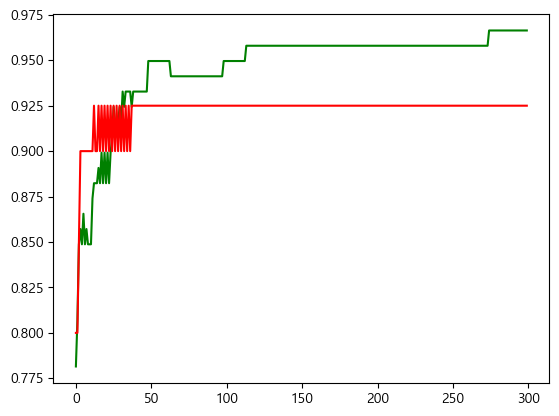

In [237]:
plt.plot(train_score,color='g') 
plt.plot(test_score,color='r')
plt.show()

In [241]:
# tol = None 무조건 max_iter = 100 만큼 반복시켜줌.
sc = SGDClassifier(loss='log_loss',max_iter=100,tol=None, random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


In [243]:
# 경사하강법: 반복해서 머신러닝 훈련시켜 정답률을 높여주는 방법